In [11]:
import pandas as pd
import numpy as np
from math import *
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("diabetes2.csv")
data.insert(0, 'ones', 1)
train_x = data.iloc[:537, :-1].to_numpy()
train_y = np.reshape(data.iloc[:537, -1].to_numpy(), (537, 1))
test_x = data.iloc[537:, :-1].to_numpy()
test_y = np.reshape(data.iloc[537:, -1].to_numpy(), (231, 1))
m = data.shape[0]

In [34]:
def sigmoid(z):
    z = np.ones(z.shape) / (1 + np.exp(-z))
    return z
alpha = 0.0003
iterations = 150000
theta = np.matrix(np.zeros([train_x.shape[1]])).astype(float).T
def compute_cost(x, y, theta):
    hypothesis = sigmoid(x * theta)
    cost = -1/m * sum(np.multiply(y, np.log(hypothesis)) + np.multiply((1 - y), np.log(1 - hypothesis)))
    return cost

[[-1.03494714e+00]
 [ 1.27925503e-01]
 [ 1.31159432e-02]
 [-2.55960454e-02]
 [-3.71334734e-03]
 [ 8.65879396e-04]
 [ 2.17655142e-02]
 [ 1.74830725e-01]
 [-1.74154829e-02]]
[[0.40183402]]


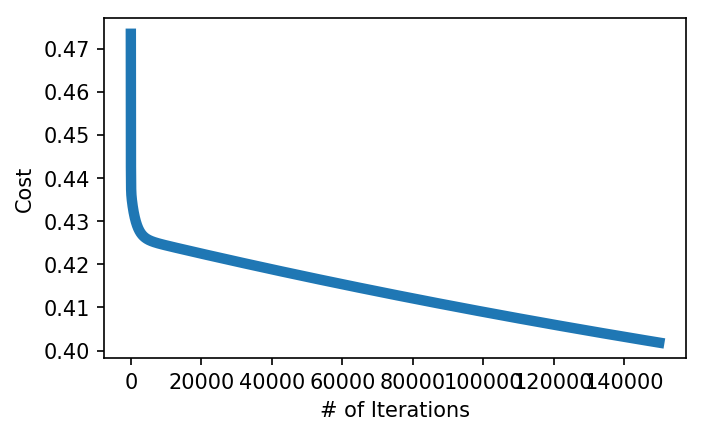

In [35]:
J_history = np.array([0, 0])
for iters in range(1, iterations):
    hypo = sigmoid(train_x * theta)
    theta = theta - alpha * 1/m * train_x.T * (hypo - train_y) 
    cost = np.array([iters, compute_cost(train_x, train_y, theta)], dtype=object)
    J_history = np.vstack((J_history, cost))
print(theta)
print(compute_cost(train_x, train_y, theta)) 
J_history = np.delete(J_history, 0, axis=0)
plt.figure(figsize=(5, 3), dpi=150)
plt.plot(J_history[:, 0], J_history[:, 1], linewidth=5)
plt.xlabel('# of Iterations')
plt.ylabel('Cost')
plt.show()

In [36]:
def predict(x):
    predict = sigmoid(np.dot(x, theta))
    predict[predict >= 0.5] = 1
    predict[predict < 0.5] = 0
    return predict

In [57]:
d = np.concatenate([predict(test_x), test_y], axis=1)
acc_test = round((np.ravel(sum(d[:, 0] == d[:, 1])/len(test_y))[0] * 100), 2)
e = np.concatenate([predict(train_x), train_y], axis=1)
acc_train = round((np.ravel(sum(e[:, 0] == e[:, 1])/len(train_y))[0]) * 100, 2)
print("Test acc: ", acc_test, "%")
print("Train acc: ", acc_train, "%")

Test acc:  70.13 %
Train acc:  72.44 %
